In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix

In [10]:
def accuracy_score(y_pred,y_true):
    score = np.sum(np.asarray(y_true) == np.asarray(y_pred))
    return score/len(y_true)

In [2]:
df = pd.read_csv("data/emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
X, y = df.iloc[:,1:-1], df.iloc[:,-1]
print(X.shape, y.shape)

(5000, 3000) (5000,)


In [11]:
avg_accuracy = {1:0,
                3:0,
                5:0,
                7:0,
                10:0}
for i in range(0,5000,1000):
    X_test = X.iloc[i:i+1000].reset_index(drop=True)
    y_test = y.iloc[i:i+1000].reset_index(drop=True)

    X_train = X.drop(np.arange(i, i+1000)).reset_index(drop=True)
    y_train = y.drop(np.arange(i, i+1000)).reset_index(drop=True)

    distmat = distance_matrix(X_test, X_train)
    print(f"\tFor Fold {(i//1000)+1}:")
    for k in [1,3,5,7,10]:
        x_min = distmat.argpartition(k-1, axis=1)[:,:k]
        x_min = x_min.reshape(-1)
        y_pred = y_train.iloc[x_min].to_numpy()
        y_pred = y_pred.reshape(len(y_test),k)
        y_pred = np.where(np.average(y_pred, axis=1) > 0.5, 1, 0)

        acc = accuracy_score(y_pred, y_test)
        avg_accuracy[k]+=acc
        print(f"Accuracy for k = {k} : {acc}")
    

	For Fold 1:
Accuracy for k = 1 : 0.825
Accuracy for k = 3 : 0.847
Accuracy for k = 5 : 0.837
Accuracy for k = 7 : 0.839
Accuracy for k = 10 : 0.862
	For Fold 2:
Accuracy for k = 1 : 0.853
Accuracy for k = 3 : 0.851
Accuracy for k = 5 : 0.85
Accuracy for k = 7 : 0.864
Accuracy for k = 10 : 0.869
	For Fold 3:
Accuracy for k = 1 : 0.862
Accuracy for k = 3 : 0.859
Accuracy for k = 5 : 0.869
Accuracy for k = 7 : 0.875
Accuracy for k = 10 : 0.878
	For Fold 4:
Accuracy for k = 1 : 0.851
Accuracy for k = 3 : 0.88
Accuracy for k = 5 : 0.869
Accuracy for k = 7 : 0.874
Accuracy for k = 10 : 0.887
	For Fold 5:
Accuracy for k = 1 : 0.775
Accuracy for k = 3 : 0.774
Accuracy for k = 5 : 0.779
Accuracy for k = 7 : 0.779
Accuracy for k = 10 : 0.782


In [26]:
np.asarray(list(avg_accuracy.values()))/5

array([0.8332, 0.8422, 0.8408, 0.8462, 0.8556])

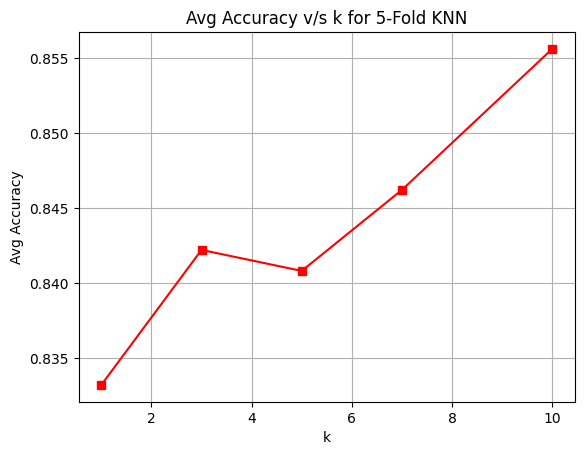

In [23]:
plt.plot(np.asarray(list(avg_accuracy.keys())),np.asarray(list(avg_accuracy.values()))/5, marker='s', c='red')
plt.xlabel("k")
plt.ylabel("Avg Accuracy")
plt.title("Avg Accuracy v/s k for 5-Fold KNN")
plt.grid(True)
plt.show()